In [1]:
#-*-coding:utf-8-*-
from GameEnv import Game2048
from DQN import DQN
import random
import copy

def check_one_game(gameEnv,debug):
    gameEnv.reset()
    flag = False
    observation = copy.deepcopy(gameEnv.matrix)
    while True:
        if debug:gameEnv.display()

        action = random.choice(["a","w","d","s"])
        observation_, reward, done = gameEnv.step(action)
        flag = True if observation_ == observation else False
        observation = copy.deepcopy(observation_)
        if debug:print("_________________________________________")
        if done:
            if debug:gameEnv.display()
            if debug:print("this_score_____________________:",gameEnv.score)
            break
    return gameEnv.score

gameEnv = Game2048()
gameEnv.grid_n = 2

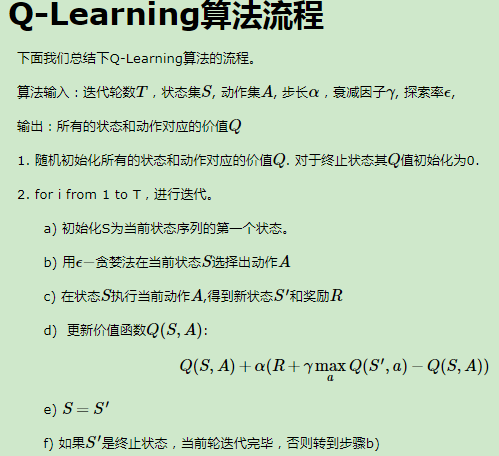

In [4]:
import itertools
import numpy as np
def transform(stauts):
    return np.array(eval(status)).reshape(2,2).tolist()

def transform_key(status):
    return str(tuple(np.array(status).reshape(-1)))

def e_greedy(action,e):
    if random.random() < e:
        return random.choice(["a","s","w","d"])
    else:
        return action

def q_learning(gameEnv):
    # 初始化
    step = 0
    e = 0.6 ** (step / 1000)
    alpha = 0.05
    gama = 1
    q_value = {}
    q_value_before = {}
    policy = {}
    policy_before = {}
    k = 0
    for s in list(itertools.permutations([0,0,0,2,2,2,4,4,4,8,8,8,16,16,16,32],4)):
        for a in ["a","s","w","d"]:
            ss = str(s)
            policy[ss] = random.choice(["a","s","w","d"])
            ss += "_" + a
            q_value[ss] = 0
            q_value_before[ss] = 0


    while True:
        # q-learning sample
        gameEnv.reset()
        flag = False
        observation = copy.deepcopy(gameEnv.matrix)
        while True:
            if flag:
                action = random.choice(["a","s","w","d"])
            else:
                action = e_greedy(policy[transform_key(gameEnv.matrix)],e)
            observation_, reward, done = gameEnv.step(action)
            flag = True if observation_ == observation else False
            ori_sa = transform_key(observation) + "_" + action
            ori_s = transform_key(observation)
            observation = copy.deepcopy(observation_)


            # find next max
            next_s = transform_key(observation_)
            q_ori = q_value[ori_sa]
            t_value_max = 0
            t_action = "a"
            for a in ["a","s","w","d"]:
                if q_value[next_s + "_" + a] > t_value_max:
                    t_value_max = q_value[next_s + "_" + a]
                    t_action = a
    #         if ori_s == str((2,2,0,0)):
    #             print reward,action
            q_value[ori_sa] = q_ori + alpha * (reward + gama * t_value_max - q_ori) #Q(s,a) = Q(s,a) + a(R + γmaxa'Q(S',a') - Q(s,a))

            # update policy
            t_value_max = 0
            t_action = "a"
            for a in ["a","s","w","d"]:
                if q_value[ori_s + "_" + a] > t_value_max:
                    t_value_max = q_value[ori_s + "_" + a]
                    t_action = a
            policy[ori_s] = e_greedy(t_action,e)

            if done:
                break

        # judge out
        if policy == policy_before and step > 100000 or step > 100000:
            break
        else:
            if step % 1000 == 0:
                print "step:%d e:%f"%(step,e)
                evaluate(gameEnv,policy)
        policy_before = copy.deepcopy(policy)
        q_value_before = copy.deepcopy(q_value)
        step += 1
        e = 0.6 ** (step / 1000)
    print "over"
    return policy,q_value

# 策略迭代测试
def check_one_game_with_policy(gameEnv,policy,debug):
    gameEnv.reset()
    flag = False
    observation = copy.deepcopy(gameEnv.matrix)
    while True:
        if debug:gameEnv.display()
        if flag:
            action = random.choice(["a","s","w","d"])
        else:
            action = policy[str(tuple(np.array(observation).reshape(-1).tolist()))][0]
        if debug:print "choose:",action
        observation_, reward, done = gameEnv.step(action)
        flag = True if observation_ == observation else False
        observation = copy.deepcopy(observation_)
        if debug:print("_________________________________________")
        if done:
            if debug:gameEnv.display()
            if debug:print("this_score_____________________:",gameEnv.score)
            break
    return gameEnv.score

def evaluate(gameEnv,policy):
    scores = []
    n = 10000
    for i in range(n):
        scores.append(check_one_game_with_policy(gameEnv,policy,False))
    print "avg:%d max:%d min:%d "%(np.average(scores),np.max(scores), np.min(scores))

In [ ]:
policy,q_value = q_learning(gameEnv)

step:0 e:1.000000
avg:24 max:156 min:0 
step:1000 e:0.600000
avg:24 max:148 min:4 
step:2000 e:0.360000
avg:35 max:160 min:4 
step:3000 e:0.216000
avg:35 max:152 min:0 
step:4000 e:0.129600
avg:41 max:156 min:4 
step:5000 e:0.077760
avg:41 max:156 min:4 
step:6000 e:0.046656
avg:45 max:160 min:12 
step:7000 e:0.027994
avg:43 max:160 min:4 
step:8000 e:0.016796
avg:47 max:160 min:12 
step:9000 e:0.010078
avg:48 max:160 min:12 
step:10000 e:0.006047
avg:49 max:160 min:12 
step:11000 e:0.003628
avg:49 max:160 min:12 
step:12000 e:0.002177
avg:49 max:160 min:12 
step:13000 e:0.001306
avg:49 max:160 min:12 
step:14000 e:0.000784
avg:49 max:160 min:12 
step:15000 e:0.000470
avg:48 max:160 min:12 
step:16000 e:0.000282
avg:49 max:160 min:12 
step:17000 e:0.000169
avg:49 max:156 min:12 
step:18000 e:0.000102
avg:49 max:160 min:12 
step:19000 e:0.000061
avg:49 max:164 min:12 
step:20000 e:0.000037
avg:49 max:164 min:12 
step:21000 e:0.000022
avg:49 max:160 min:12 
step:22000 e:0.000013
avg:49 m

In [63]:
check_one_game_with_policy(gameEnv,policy,True)

-	 2	 

-	 2	 

choose: s
_________________________________________
4	 -	 

-	 4	 

choose: s
_________________________________________
2	 -	 

4	 4	 

choose: a
_________________________________________
2	 4	 

8	 -	 

choose: a
_________________________________________
2	 4	 

8	 -	 

choose: s
_________________________________________
2	 2	 

8	 4	 

choose: a
_________________________________________
4	 4	 

8	 4	 

choose: a
_________________________________________
8	 2	 

8	 4	 

choose: d
_________________________________________
8	 2	 

8	 4	 

choose: d
_________________________________________
8	 2	 

8	 4	 

choose: d
_________________________________________
8	 2	 

8	 4	 

choose: s
_________________________________________
4	 2	 

16	 4	 

('this_score_____________________:', 40)


40

step:0 e:1.000000
avg:24 max:144 min:0 
step:1000 e:0.600000
avg:23 max:148 min:0 
step:2000 e:0.360000
avg:26 max:152 min:0 
step:3000 e:0.216000
avg:28 max:148 min:0 
step:4000 e:0.129600
avg:32 max:160 min:0 
step:5000 e:0.077760
avg:31 max:160 min:0 
step:6000 e:0.046656
avg:33 max:160 min:0 


KeyboardInterrupt: 

In [76]:
np.sort(q_value.values())

array([  0,   0,   0, ..., 160, 160, 160])

In [77]:
q_value[str((2,2,0,0))+"_s"]

156

In [78]:
q_value[str((2,2,0,0))+"_a"]

152

In [79]:
q_value[str((2,2,0,0))+"_w"]

160

In [80]:
q_value[str((2,2,0,0))+"_d"]

152

In [81]:
policy[str((2,2,0,0))]

'a'

In [74]:
e_greedy("w",e)

'w'